In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def plot_performance(filename, title):
    data = pd.read_csv(filename)
    
    plt.figure(figsize=(12, 7))
    
    plt.plot(data['n'], data['T_naive_ms'], label='Наивный алгоритм (T_A)', marker='o', markersize=4)
    plt.plot(data['n'], data['T_ram_ms'], label='Алгоритм с DSU (T_B)', marker='x', markersize=5)
    
    plt.title(title, fontsize=16)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Количество вершин (n) - log', fontsize=12)
    plt.ylabel('Время выполнения (мс) - log', fontsize=12)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.show()

def plot_connectivity(filename, title):
    data = pd.read_csv(filename)

    plt.figure(figsize=(12, 7))
    plt.plot(data['n'], data['m_required'], label='Необходимое число ребер', marker='.')
    
    plt.title(title, fontsize=16)
    plt.xlabel('Количество вершин (n)', fontsize=12)
    plt.ylabel('Число ребер для связности (m)', fontsize=12)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()

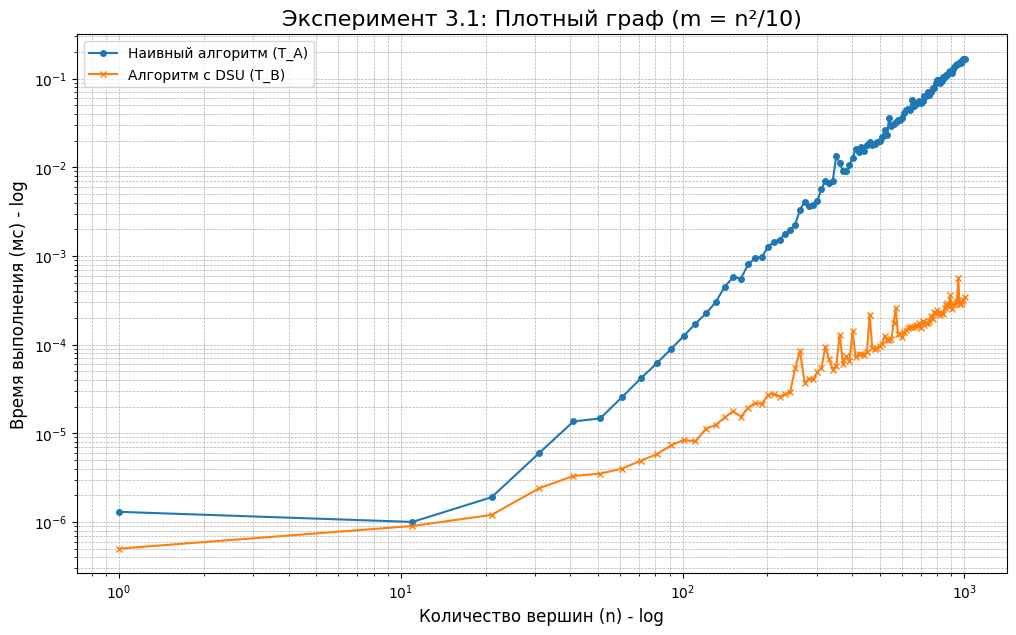

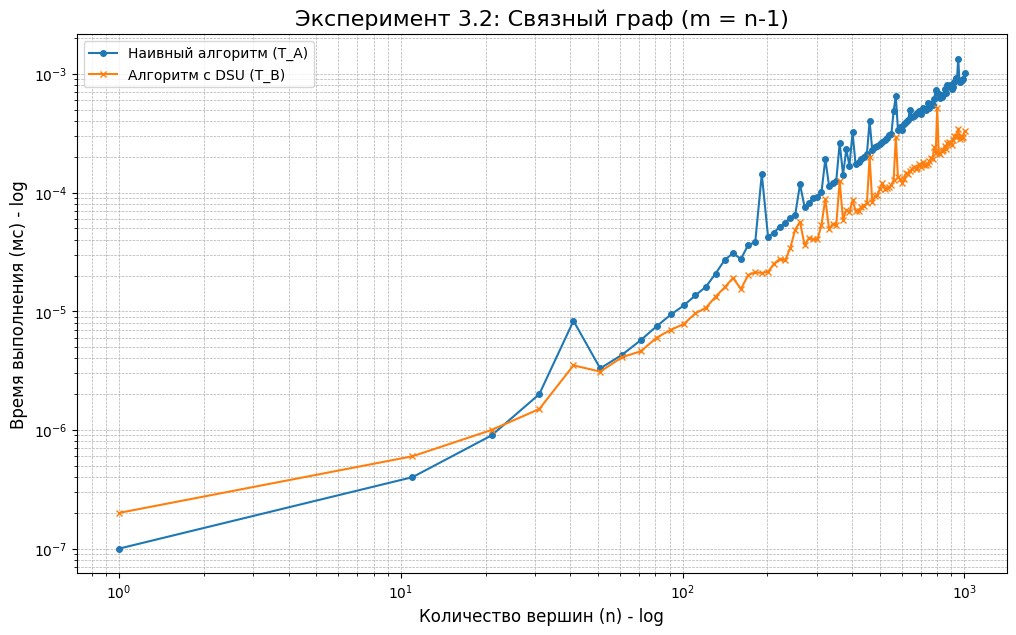

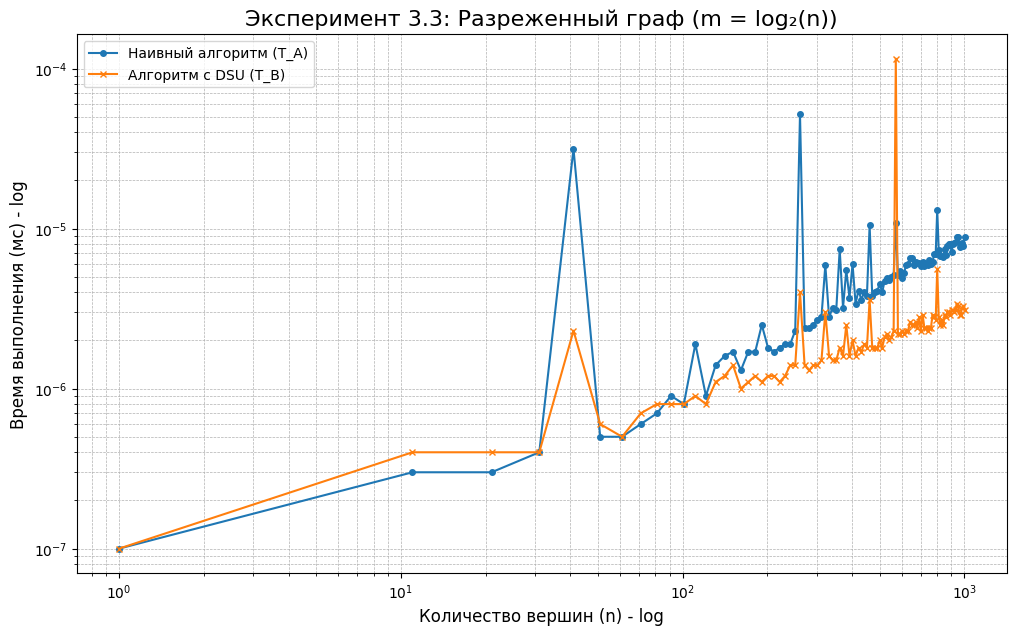

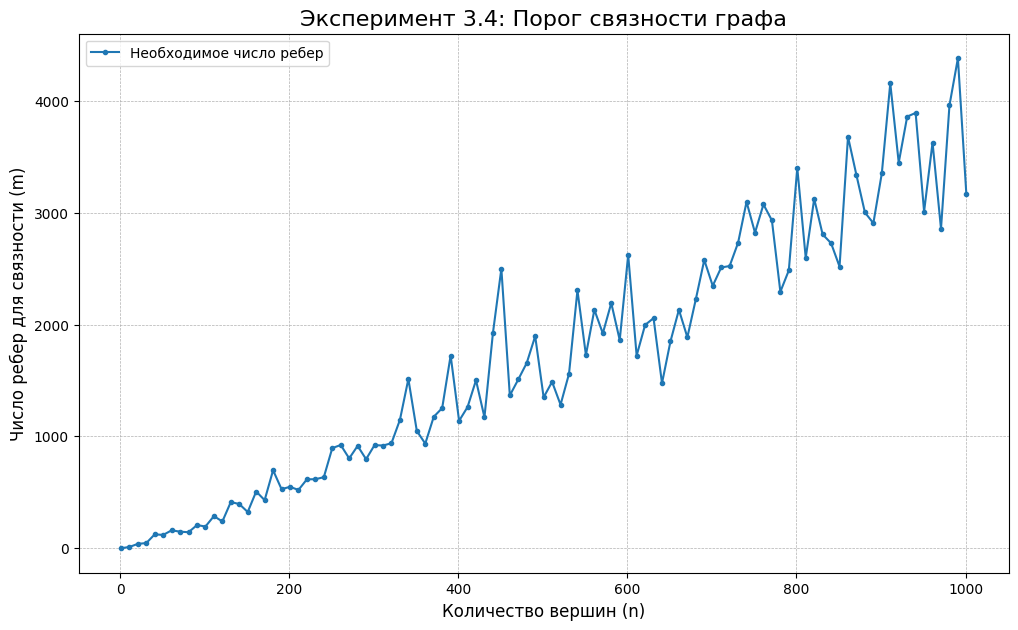

In [11]:
plot_performance('exp_3_1_dense.csv', 'Эксперимент 3.1: Плотный граф (m = n²/10)')
plot_performance('exp_3_2_tree.csv', 'Эксперимент 3.2: Связный граф (m = n-1)')
plot_performance('exp_3_3_sparse.csv', 'Эксперимент 3.3: Разреженный граф (m = log₂(n))')
plot_connectivity('exp_3_4_connectivity.csv', 'Эксперимент 3.4: Порог связности графа')


3.1: Плотный граф
Наивный алгоритм: приблизительное k=3.06
Алгоритм Рэма: приблизительное k=1.52


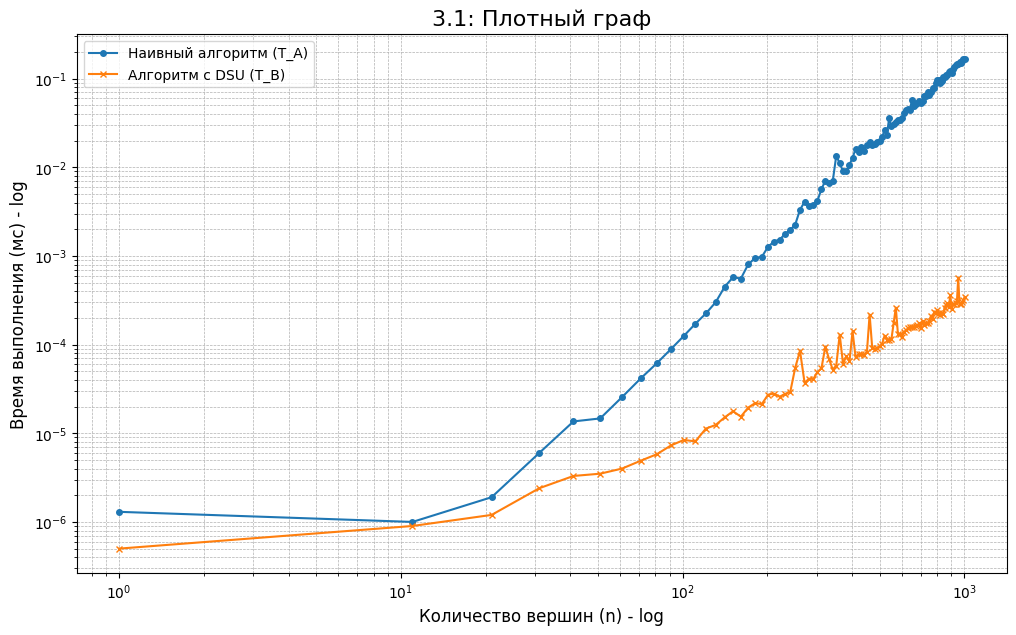


3.2: Дерево
Наивный алгоритм: приблизительное k=1.84
Алгоритм Рэма: приблизительное k=1.54


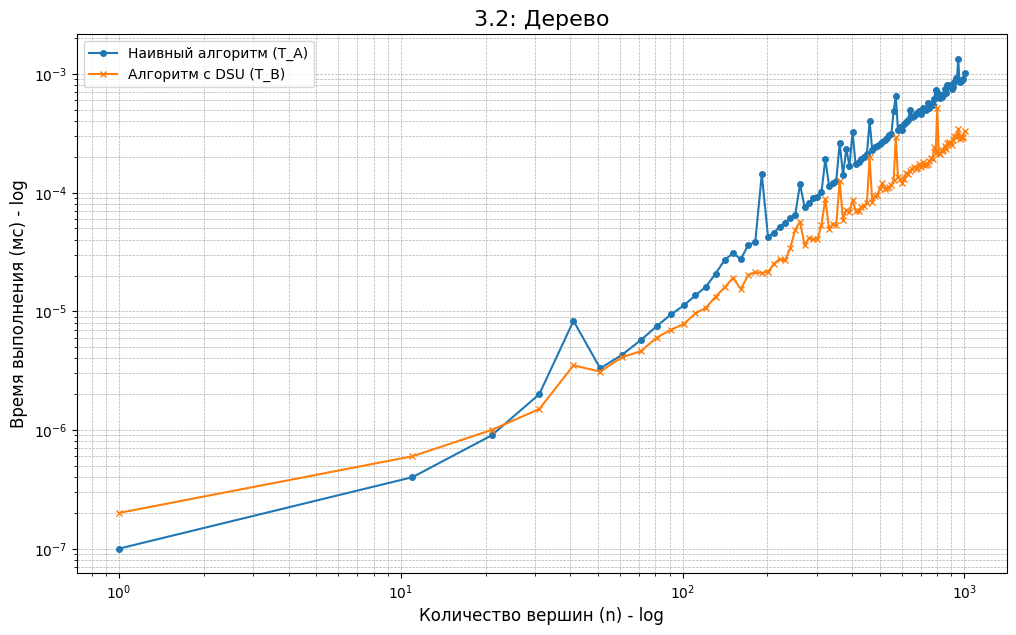


3.3: Разреженный граф
Наивный алгоритм: приблизительное k=0.78
Алгоритм Рэма: приблизительное k=0.54


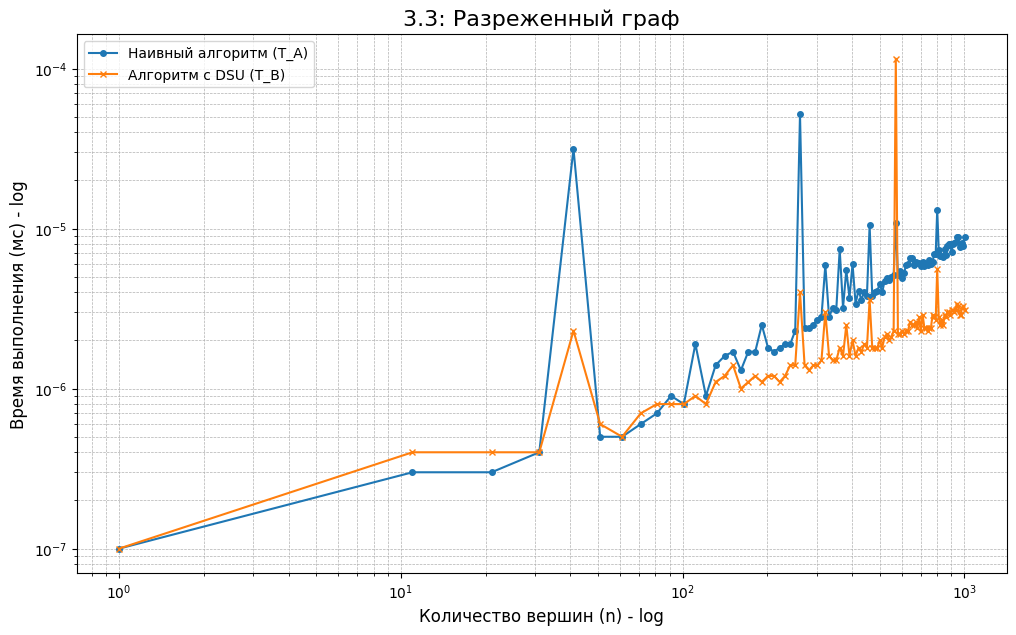

In [20]:
import numpy as np
from scipy.stats import linregress

def calculate_complexity_exponent(data_series_n, data_series_t, label):

    valid_indices = data_series_t > 0
    n_clean = data_series_n[valid_indices]
    t_clean = data_series_t[valid_indices]

    log_n = np.log(n_clean)
    log_t = np.log(t_clean)

    slope, _, _, _, _ = linregress(log_n, log_t)
    return slope

def analyze_experiment(filename, exp_title):
    data = pd.read_csv(filename)

    k_A = calculate_complexity_exponent(data['n'][2:], data['T_naive_ms'][2:], 'Наивный алгоритм (T_A)')
    k_B = calculate_complexity_exponent(data['n'][2:], data['T_ram_ms'][2:], 'Алгоритм DSU (T_B)')
    
    print(f"\n{exp_title}")
    print(f"Наивный алгоритм: приблизительное k={k_A:.2f}")
    print(f"Алгоритм Рэма: приблизительное k={k_B:.2f}")
    
    plot_performance(filename, exp_title)

analyze_experiment('exp_3_1_dense.csv', '3.1: Плотный граф')
analyze_experiment('exp_3_2_tree.csv', '3.2: Дерево')
analyze_experiment('exp_3_3_sparse.csv', '3.3: Разреженный граф') 